In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/HitBuy Atrium/Downloads/NSE-TATAGLOBAL11.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


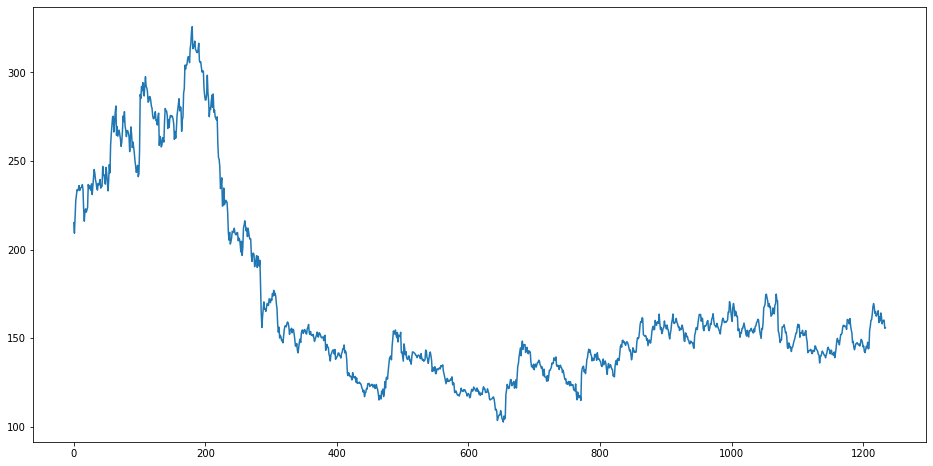

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [5]:
#import quandl - library linked to website quandl, for easy import of company historical stock price. 
#widely used, though, not used here as I used data set from my computer.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [7]:
table = df[['Close']] #only closing data recquired

In [8]:
print(table.head(5))

    Close
0  215.15
1  209.20
2  218.20
3  227.60
4  230.90


In [15]:
df.isna().values.any()

False

In [11]:
forecast_out = 30 #forecast variable for next 30 days, but variable created to manipulate the number of days for which
                  #prediction is required.

In [12]:
table['Prediction'] = table[['Close']].shift(-forecast_out) #creating col for prediction

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
print(table.tail(10))

       Close  Prediction
1225  161.85         NaN
1226  159.60         NaN
1227  164.20         NaN
1228  162.00         NaN
1229  158.05         NaN
1230  159.45         NaN
1231  160.05         NaN
1232  160.15         NaN
1233  155.55         NaN
1234  155.80         NaN


In [17]:
X = np.array(table.drop(['Prediction'],1))#X is the independent dataset created to train the array

In [18]:
X = X[:-forecast_out]
print(X)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [142.4 ]
 [141.8 ]
 [143.65]]


In [19]:
y = np.array(table['Prediction'])

In [20]:
y = y[:-forecast_out]
print(y)

[240.55 245.15 243.   ... 160.15 155.55 155.8 ]


In [23]:
#next, I have used Support Vector machine, 
#because I understand this is one of the models suitable while predicting something like this
#first, in this cell, I have used train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

#here test_size=0.25 indicates that I prefer to have 75% data as training and rest 25% as test data. One can vary it

In [22]:
#rbf: Radial Bias function. More info here: https://en.wikipedia.org/wiki/Radial_basis_function_kernel
#looks a lot like measure theoretic notations
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)  
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
sv_confidence_level = svr_rbf.score(x_test, y_test)
print("svm confidence: ", sv_confidence_level)

svm confidence:  0.9208430936608719


In [28]:
#training a linear regression model
#defining constructor lm
lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#R^2 calculation to check the fit
lm.score(x_test,y_test)

0.8580735921070677

In [32]:
x_forecast = np.array(table.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[145.35]
 [144.55]
 [147.7 ]
 [143.95]
 [144.3 ]
 [154.55]
 [156.55]
 [160.1 ]
 [160.35]
 [163.55]
 [167.6 ]
 [169.5 ]
 [167.7 ]
 [164.  ]
 [165.  ]
 [162.4 ]
 [163.25]
 [163.85]
 [165.45]
 [158.75]
 [161.85]
 [159.6 ]
 [164.2 ]
 [162.  ]
 [158.05]
 [159.45]
 [160.05]
 [160.15]
 [155.55]
 [155.8 ]]


In [33]:
#now predicting next 30 days price
lm.predict(x_forecast)

array([145.66566389, 144.92840421, 147.8313642 , 144.37545945,
       144.69801056, 154.1441502 , 155.9872994 , 159.25888922,
       159.48928287, 162.43832159, 166.17069872, 167.92169045,
       166.26285618, 162.85303016, 163.77460476, 161.3785108 ,
       162.16184921, 162.71479397, 164.18931333, 158.01476351,
       160.87164477, 158.79810192, 163.03734508, 161.00988096,
       157.3696613 , 158.65986573, 159.21281049, 159.30496795,
       155.0657248 , 155.29611845])